# Original MNIST

## SimpleDNN
### import & dataSetup

In [16]:
import numpy as np
#dataSetup
from keras.utils import np_utils
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_train = x_train.astype('float32')
x_train = x_train / 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)

x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

In [17]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(100, input_dim=784, activation='relu'))
model.add(Dense(10, input_dim=100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, epochs=10, batch_size=1000,
         verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 8us/step - loss: 1.4107 - accuracy: 0.5480 - val_loss: 0.6556 - val_accuracy: 0.8491
Epoch 2/10
60000/60000 [==============================] - 0s 7us/step - loss: 0.4871 - accuracy: 0.8768 - val_loss: 0.3625 - val_accuracy: 0.9091
Epoch 3/10
60000/60000 [==============================] - 0s 7us/step - loss: 0.3226 - accuracy: 0.9147 - val_loss: 0.2727 - val_accuracy: 0.9282
Epoch 4/10
60000/60000 [==============================] - 0s 7us/step - loss: 0.2517 - accuracy: 0.9315 - val_loss: 0.2261 - val_accuracy: 0.9407
Epoch 5/10
60000/60000 [==============================] - 0s 8us/step - loss: 0.2110 - accuracy: 0.9415 - val_loss: 0.1968 - val_accuracy: 0.9437
Epoch 6/10
60000/60000 [==============================] - 0s 8us/step - loss: 0.1823 - accuracy: 0.9489 - val_loss: 0.1743 - val_accuracy: 0.9495
Epoch 7/10
60000/60000 [==============================] - 0s 7us/step - lo

#### sigmoid
mid=100 0.9292<br>
mid=10 0.8598
#### ReLU
mid=100 0.9601
mid=10 0.9167

## Use Conv
### import & dataSetup

In [4]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [5]:
n = 3

import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(8, (n, n), padding='same',
                input_shape=(28, 28, 1), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [6]:
model.fit(x_train, y_train, batch_size=1000, epochs=10,
         verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.8798 - accuracy: 0.7975 - val_loss: 0.3580 - val_accuracy: 0.8994
Epoch 2/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.3204 - accuracy: 0.9082 - val_loss: 0.2665 - val_accuracy: 0.9267
Epoch 3/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.2459 - accuracy: 0.9307 - val_loss: 0.2081 - val_accuracy: 0.9424
Epoch 4/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.1935 - accuracy: 0.9460 - val_loss: 0.1700 - val_accuracy: 0.9539
Epoch 5/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.1560 - accuracy: 0.9573 - val_loss: 0.1436 - val_accuracy: 0.9607
Epoch 6/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.1314 - accuracy: 0.9642 - val_loss: 0.1208 - val_accuracy: 0.9671
Epoch 7/10
60000/60000 [==============================] - 4s 59us/st

In [7]:
0.9751
0.9851

0.9851

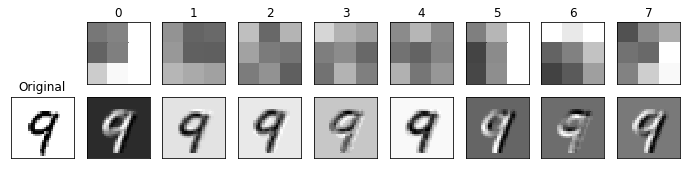

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")

w = model.layers[0].get_weights()[0]
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i + 2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(n, n)
    plt.pcolor(-w1, vmin=min_w, vmax=max_w)
    plt.xlim(0, n)
    plt.ylim(n, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
    plt.subplot(2, 9, i + 11)
    out_img = np.zeros_like(x_img)
    for ih in range(img_h - n):
        for iw in range(img_w - n):
            img_part = x_img[ih:ih + n, iw:iw + n]
            out_img[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()

## Data Encode
### import & dataSetup

In [9]:

#dataSetup
from keras.utils import np_utils
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_train = x_train.astype('float32')
x_train = x_train / 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)

x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

In [10]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(128, input_dim=784, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(36, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [11]:
model.fit(x_train, x_train, epochs=10, batch_size=1000,
         verbose=1, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.3600 - accuracy: 0.7520 - val_loss: 0.2538 - val_accuracy: 0.7941
Epoch 2/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.2294 - accuracy: 0.7940 - val_loss: 0.2041 - val_accuracy: 0.7942
Epoch 3/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.1879 - accuracy: 0.7977 - val_loss: 0.1699 - val_accuracy: 0.8003
Epoch 4/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.1624 - accuracy: 0.8026 - val_loss: 0.1521 - val_accuracy: 0.8033
Epoch 5/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.1473 - accuracy: 0.8057 - val_loss: 0.1400 - val_accuracy: 0.8054
Epoch 6/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.1379 - accuracy: 0.8075 - val_loss: 0.1327 - val_accuracy: 0.8078
Epoch 7/10
60000/60000 [==============================] - 2s 35us/st

In [21]:
import matplotlib.pyplot as plt
from matplotlib import cm
image_height = 28
image_width = 28

encoder = models.clone_model(model)
encoder.compile(optimizer='adam',
                    loss='binary_crossentropy')
encoder.set_weights(model.get_weights())
# 最終段のレイヤーを取り除く
encoder.pop()
encoder.pop()
encoder.pop()

p = np.random.random_integers(0, len(x_test), 10)
x_test_sampled = x_test[p]
x_test_sampled_pred = model.predict_proba(x_test_sampled,
                                              verbose=0)
x_test_sampled_enc = encoder.predict_proba(x_test_sampled,
                                               verbose=0)

fig, axes = plt.subplots(3, 10)
for i, label in enumerate(y_test[p]):
    # 元画像を上段に表示する
    img = x_test_sampled[i].reshape(image_height, image_width)
    axes[0][i].imshow(img, cmap=cm.gray_r)
    axes[0][i].axis('off')
    axes[0][i].set_title(label, color='red')
    # AutoEncoder で次元圧縮した画像を下段に表示する
    enc_img = x_test_sampled_enc[i].reshape(6, 6)
    axes[1][i].imshow(enc_img, cmap=cm.gray_r)
    axes[1][i].axis('off')
    #AutoEncoder で復元した画像を下段に表示する
    pred_img = x_test_sampled_pred[i].reshape(image_height, image_width)
    axes[2][i].imshow(pred_img, cmap=cm.gray_r)
    axes[2][i].axis('off')

plt.show()

NameError: name 'models' is not defined

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np
from keras import layers
from keras import models
from keras import callbacks
from keras.datasets import mnist
from matplotlib import pyplot as plt
from matplotlib import cm

def main():
    # MNIST データセットを読み込む
    (x_train, train), (x_test, y_test) = mnist.load_data()
    image_height, image_width = 28, 28
    # 中間層で圧縮される次元数
    encoding_dim = 36  # 中間層の出力を 6 x 6 の画像として可視化するため

    # Flatten
    x_train = x_train.reshape(x_train.shape[0], image_height * image_width)
    x_test = x_test.reshape(x_test.shape[0], image_height * image_width)

    # Min-Max Normalization
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
    x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())

    # 中間層が一層だけの単純な AutoEncoder
    model = models.Sequential()
    model.add(layers.Dense(encoding_dim, activation='relu',
                           input_shape=(image_height * image_width,)))
    model.add(layers.Dense(image_height * image_width,
                           activation='sigmoid'))

    # モデルの構造を確認する
    print(model.summary())

    model.compile(optimizer='adam',
                  loss='binary_crossentropy')

    fit_callbacs = [
        callbacks.EarlyStopping(monitor='val_loss',
                                patience=5,
                                mode='min')
    ]

    # モデルを学習させる
    model.fit(x_train, x_train,
              epochs=10,
              batch_size=256,
              shuffle=True,
              validation_data=(x_test, x_test),
              callbacks=fit_callbacs,
              )

    # テストデータの損失を確認しておく
    score = model.evaluate(x_test, x_test, verbose=0)
    print('test xentropy:', score)

    # 学習済みのモデルを元に、次元圧縮だけするモデルを用意する
    encoder = models.clone_model(model)
    encoder.compile(optimizer='adam',
                    loss='binary_crossentropy')
    encoder.set_weights(model.get_weights())
    # 最終段のレイヤーを取り除く
    encoder.pop()

    # テストデータからランダムに 10 点を選び出す
    p = np.random.random_integers(0, len(x_test), 10)
    x_test_sampled = x_test[p]
    # 選びだしたサンプルを AutoEncoder にかける
    x_test_sampled_pred = model.predict_proba(x_test_sampled,
                                              verbose=0)
    # 次元圧縮だけする場合
    x_test_sampled_enc = encoder.predict_proba(x_test_sampled,
                                               verbose=0)

    # 処理結果を可視化する
    fig, axes = plt.subplots(3, 10)
    for i, label in enumerate(y_test[p]):
        # 元画像を上段に表示する
        img = x_test_sampled[i].reshape(image_height, image_width)
        axes[0][i].imshow(img, cmap=cm.gray_r)
        axes[0][i].axis('off')
        axes[0][i].set_title(label, color='red')
        # AutoEncoder で次元圧縮した画像を下段に表示する
        enc_img = x_test_sampled_enc[i].reshape(6, 6)
        axes[1][i].imshow(enc_img, cmap=cm.gray_r)
        axes[1][i].axis('off')
        # AutoEncoder で復元した画像を下段に表示する
        pred_img = x_test_sampled_pred[i].reshape(image_height, image_width)
        axes[2][i].imshow(pred_img, cmap=cm.gray_r)
        axes[2][i].axis('off')

    plt.show()


if __name__ == '__main__':
    main()

## GAN Challenge

In [ ]:
### -*-coding:utf-8-*-
from __future__ import print_function, division

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Convolution2D
from keras.models import Sequential, Model, load_model

from keras.optimizers import Adam

import matplotlib.pyplot as plt

import sys

import numpy as np

class DCGAN():
    
    def __init__(self):
        self.path = "/volumes/data/dataset/gan/MNIST/dcgan/dcgan_generated_images/"
        #mnistデータ用の入力データサイズ
        self.img_rows = 28 
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        
        # 潜在変数の次元数 
        self.z_dim = 5

        # 画像保存の際の列、行数
        self.row = 5
        self.col = 5
        self.row2 = 1 # 連続潜在変数用
        self.col2 = 10# 連続潜在変数用 
        
        # 画像生成用の固定された入力潜在変数
        self.noise_fix1 = np.random.normal(0, 1, (self.row * self.col, self.z_dim)) 
        # 連続的に潜在変数を変化させる際の開始、終了変数
        self.noise_fix2 = np.random.normal(0, 1, (1, self.z_dim))
        self.noise_fix3 = np.random.normal(0, 1, (1, self.z_dim))

        # 横軸がiteration数のプロット保存用np.ndarray
        self.g_loss_array = np.array([])
        self.d_loss_array = np.array([])
        self.d_accuracy_array = np.array([])
        self.d_predict_true_num_array = np.array([])
        self.c_predict_class_list = []

        discriminator_optimizer = Adam(lr=1e-5, beta_1=0.1)
        combined_optimizer = Adam(lr=2e-4, beta_1=0.5)

        # discriminatorモデル
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy', 
            optimizer=discriminator_optimizer,
            metrics=['accuracy'])

        # Generatorモデル
        self.generator = self.build_generator()
        # generatorは単体で学習しないのでコンパイルは必要ない
        #self.generator.compile(loss='binary_crossentropy', optimizer=optimizer)

        self.combined = self.build_combined1()
        #self.combined = self.build_combined2()
        self.combined.compile(loss='binary_crossentropy', optimizer=combined_optimizer)

        # Classifierモデル
        self.classifier = self.build_classifier()

    def build_generator(self):

        noise_shape = (self.z_dim,)
        model = Sequential()
        model.add(Dense(1024, input_shape=noise_shape))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dense(128*7*7))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Reshape((7,7,128), input_shape=(128*7*7,)))
        model.add(UpSampling2D((2,2)))
        model.add(Convolution2D(64,5,5,border_mode='same'))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(UpSampling2D((2,2)))
        model.add(Convolution2D(1,5,5,border_mode='same'))
        model.add(Activation('tanh'))
        model.summary()
        return model

    def build_discriminator(self):

        img_shape = (self.img_rows, self.img_cols, self.channels)
        
        model = Sequential()
        model.add(Convolution2D(64,5,5, subsample=(2,2),\
                  border_mode='same', input_shape=img_shape))
        model.add(LeakyReLU(0.2))
        model.add(Convolution2D(128,5,5,subsample=(2,2)))
        model.add(LeakyReLU(0.2))
        model.add(Flatten())
        model.add(Dense(256))
        model.add(LeakyReLU(0.2))
        model.add(Dropout(0.5))
        model.add(Dense(1))
        model.add(Activation('sigmoid'))   
        return model
    
    def build_combined1(self):
        self.discriminator.trainable = False
        model = Sequential([self.generator, self.discriminator])
        return model

    def build_combined2(self):
        z = Input(shape=(self.z_dim,))
        img = self.generator(z)
        self.discriminator.trainable = False
        valid = self.discriminator(img)
        model = Model(z, valid)
        model.summary()
        return model

    def build_classifier(self):
        model = load_model("cnn_model.h5")
        model.load_weights('cnn_weight.h5')
        return model



    def train(self, epochs, batch_size=128, save_interval=50):

        # mnistデータの読み込み
        (X_train, _), (_, _) = mnist.load_data()

        # 値を-1 to 1に規格化
        X_train = (X_train.astype(np.float32) - 127.5) / 127.5
        X_train = np.expand_dims(X_train, axis=3)

        half_batch = int(batch_size / 2)

        self.g_loss_array = np.zeros(epochs)
        self.d_loss_array = np.zeros(epochs)
        self.d_accuracy_array = np.zeros(epochs)
        self.d_predict_true_num_array = np.zeros(epochs)

        for epoch in range(epochs):

            # ---------------------
            #  Discriminatorの学習
            # ---------------------

            # バッチサイズの半数をGeneratorから生成
            noise = np.random.normal(0, 1, (half_batch, self.z_dim))
            gen_imgs = self.generator.predict(noise)


            # バッチサイズの半数を教師データからピックアップ
            idx = np.random.randint(0, X_train.shape[0], half_batch)
            imgs = X_train[idx]

            # discriminatorを学習
            # 本物データと偽物データは別々に学習させる
            d_loss_real = self.discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
            # それぞれの損失関数を平均
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # discriminatorの予測（本物と偽物が半々のミニバッチ）
            d_predict = self.discriminator.predict_classes(np.concatenate([gen_imgs,imgs]), verbose=0)
            d_predict = np.sum(d_predict)

# classifierの予測
            c_predict = self.classifier.predict_classes(np.concatenate([gen_imgs,imgs]), verbose=0)


            # ---------------------
            #  Generatorの学習
            # ---------------------

            noise = np.random.normal(0, 1, (batch_size, self.z_dim))


            # 生成データの正解ラベルは本物（1） 
            valid_y = np.array([1] * batch_size)

            # Train the generator
            g_loss = self.combined.train_on_batch(noise, valid_y)


            # 進捗の表示
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # np.ndarrayにloss関数を格納
            self.g_loss_array[epoch] = g_loss
            self.d_loss_array[epoch] = d_loss[0]
            self.d_accuracy_array[epoch] = 100*d_loss[1]
            self.d_predict_true_num_array[epoch] = d_predict
            self.c_predict_class_list.append(c_predict)

            if epoch % save_interval == 0:
                
                # 毎回異なる乱数から画像を生成
                self.save_imgs(self.row, self.col, epoch, '', noise)
                # 毎回同じ値から画像を生成
                self.save_imgs(self.row, self.col, epoch, 'fromFixedValue', self.noise_fix1)
                # 二つの潜在変数の間の遷移画像を生成
                total_images = self.row*self.col
                noise_trans = np.zeros((total_images, self.z_dim))
                for i in range(total_images):
                    t = (i*1.)/((total_images-1)*1.)
                    noise_trans[i,:] = t * self.noise_fix2 + (1-t) * self.noise_fix3
                self.save_imgs(self.row2, self.col2, epoch, 'trans', noise_trans)

                # classifierに生成画像のクラス識別をさせる（10000サンプル）
                noise = np.random.normal(0, 1, (10000, self.z_dim))
                class_res = self.classifier.predict_classes(self.generator.predict(noise), verbose=0)
                # plot histgram
                plt.hist(class_res)
                plt.savefig(self.path + "mnist_hist_%d.png" % epoch)
                plt.ylim(0,2000)
                plt.close()


       
                # 学習結果をプロット
                fig, ax = plt.subplots(4,1, figsize=(8.27,11.69))
                ax[0].plot(self.g_loss_array[:epoch])
                ax[0].set_title("g_loss")
                ax[1].plot(self.d_loss_array[:epoch])
                ax[1].set_title("d_loss")
                ax[2].plot(self.d_accuracy_array[:epoch])
                ax[2].set_title("d_accuracy")
                ax[3].plot(self.d_predict_true_num_array[:epoch])
                ax[3].set_title("d_predict_true_num_array")
                fig.suptitle("epoch: %5d" % epoch)
                fig.savefig(self.path + "training_%d.png" % epoch)
                plt.close()

        # 重みを保存
        self.generator.save_weights(self.path + "generator_%s.h5" % epoch)
        self.discriminator.save_weights(self.path + "discriminator_%s.h5" % epoch)


            

    def save_imgs(self, row, col, epoch, filename, noise):
        # row, col
        # 生成画像を敷き詰めるときの行数、列数
    
        gen_imgs = self.generator.predict(noise)
    
        # 生成画像を0-1に再スケール
        gen_imgs = 0.5 * gen_imgs + 0.5
    
    
        fig, axs = plt.subplots(row, col)
        cnt = 0
        if row == 1:
            for j in range(col):
                axs[j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[j].axis('off')
                cnt += 1
        else:
            for i in range(row):
                for j in range(col):
                    axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                    axs[i,j].axis('off')
                    cnt += 1

        #fig.savefig("images/mnist_%s_%d.png" % (filename, epoch))
        fig.suptitle("epoch: %5d" % epoch)
        fig.savefig(self.path + "mnist_%s_%d.png" % (filename, epoch))
        plt.close()
    
 
if __name__ == '__main__':
    gan = DCGAN()
    gan.train(epochs=100000, batch_size=32, save_interval=1000)
